In [2]:
#to ignore the waernings
import warnings
warnings.filterwarnings('ignore')

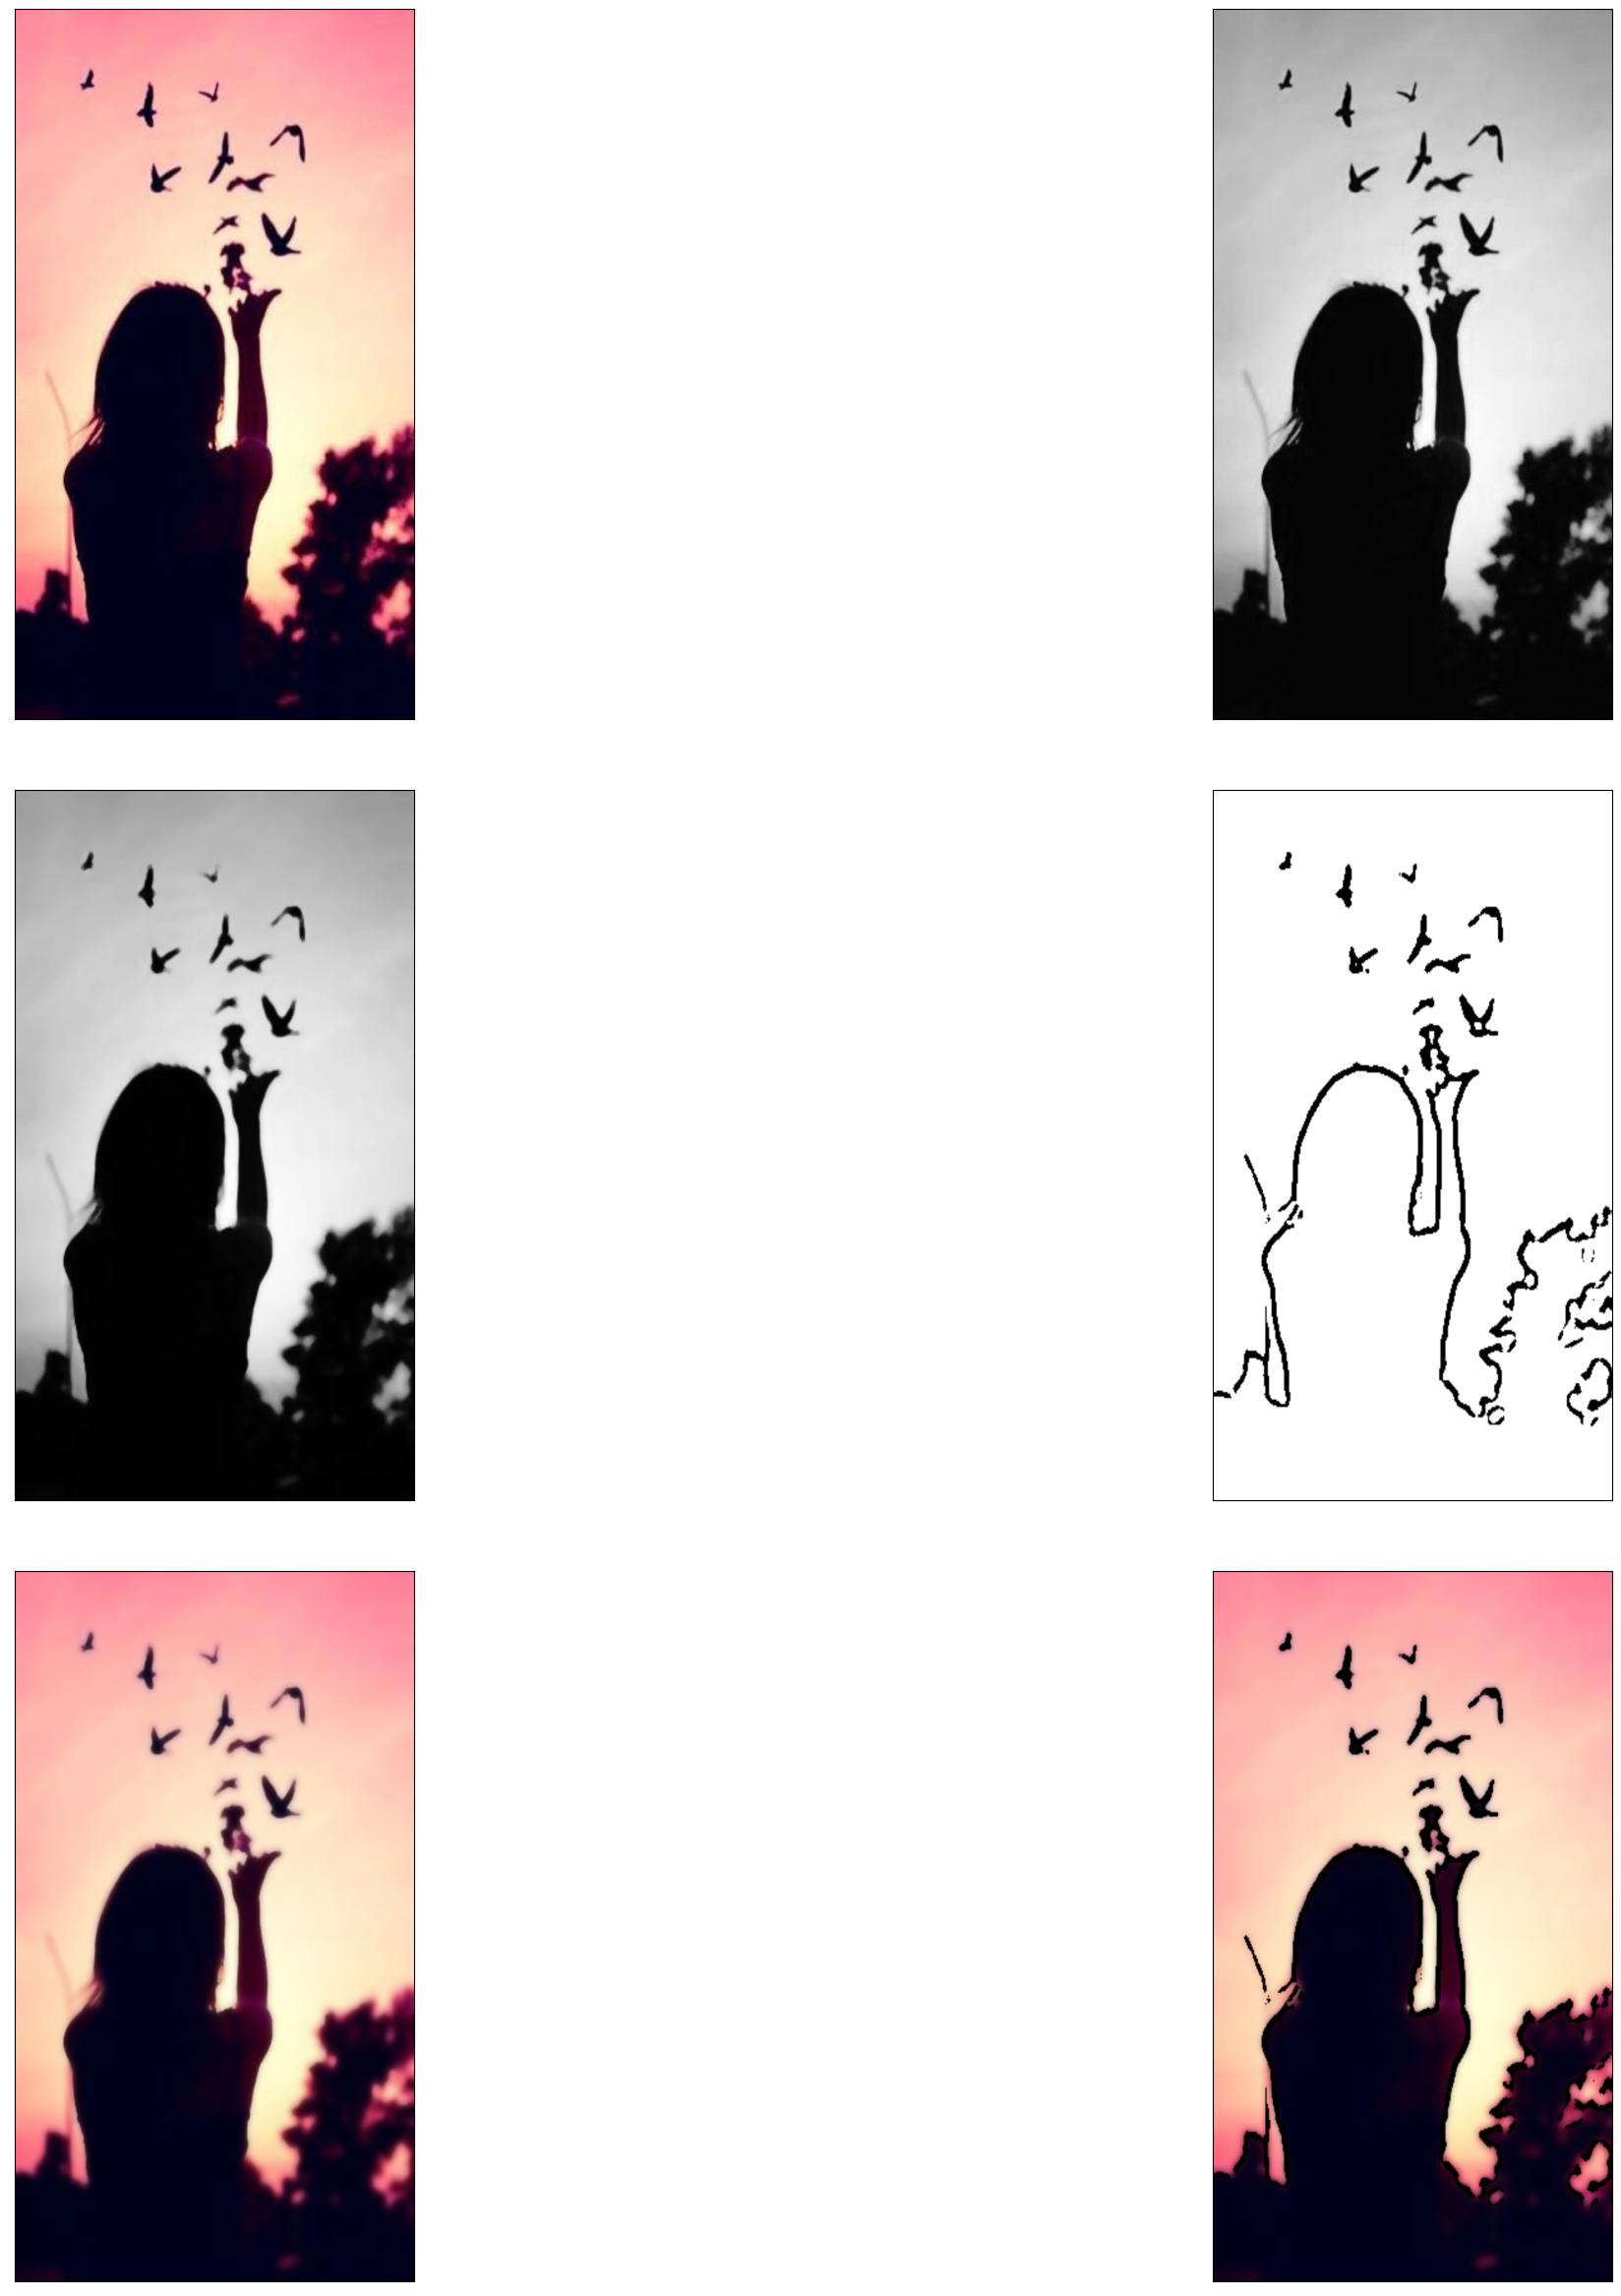

In [ ]:
# Import necessary libraries
import cv2             # OpenCV for image processing
import sys             # System-specific parameters and functions
import os              # Operating system-dependent functionality
import tkinter as tk   # GUI library for the main application window
from tkinter import filedialog, messagebox  # File dialog and message box components
from tkinter import *  # Importing tkinter components
from PIL import ImageTk, Image  # Pillow for image manipulation
import matplotlib.pyplot as plt  # Matplotlib for displaying images
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg  # Matplotlib canvas for embedding plots in tkinter

# Create a class for the CartoonifyApp
class CartoonifyApp:
    def __init__(self, root):
        # Initialize the application window
        self.root = root
        self.root.geometry('500x500')
        self.root.title('Cartoonify Your Image!')
        self.root.configure(background='#26B0D2')
        
        self.canvas = None
        self.ImagePath = None
        self.ReSized6 = None  # Store the cartoonified image
        
        # Create "Cartoonify an Image" button
        upload = tk.Button(root, text="Cartoonify an Image", command=self.upload, padx=50, pady=10)
        upload.configure(background='#F28A90', foreground='black', font=('ariel', 10, 'bold'))
        upload.pack(side=tk.TOP, pady=200)
        
        # Create "Save cartoon image" button
        save1 = tk.Button(root, text="Save cartoon image", command=self.save, padx=30, pady=5)
        save1.configure(background='#FE9666', foreground='black', font=('calibri', 10, 'bold'))
        save1.pack(side=tk.TOP, pady=10)
    
    def upload(self):
        # Open a file dialog to select an image
        self.ImagePath = filedialog.askopenfilename()
        # Process the selected image
        self.cartoonify(self.ImagePath)
    
    def cartoonify(self, ImagePath):
        # Load the original image and apply image processing steps
        originalImage = cv2.imread(ImagePath)
        originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
        
        # Image processing steps...
        # ...

        # Display images using matplotlib and tkinter
        
        if originalImage is None:
            print("Can not find any image. Choose an appropriate file")
            sys.exit()

        ReSized1 = cv2.resize(originalImage, (1080, 1920))
        grayScaleImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
        ReSized2 = cv2.resize(grayScaleImage, (1080, 1920))

        smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
        ReSized3 = cv2.resize(smoothGrayScale, (1080, 1920))

        getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
        ReSized4 = cv2.resize(getEdge, (1080, 1920))

        colorImage = cv2.bilateralFilter(originalImage, 9, 300, 300)
        ReSized5 = cv2.resize(colorImage, (1080, 1920))

        cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
        self.ReSized6 = cv2.resize(cartoonImage, (1080, 1920))
        
        self.display_images([ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, self.ReSized6])
    
    def display_images(self, images):
        # Close previous canvas if it exists
        if self.canvas:
            self.canvas.get_tk_widget().destroy()
            
        # Create a matplotlib figure with subplots
        fig, axes = plt.subplots(3, 2, figsize=(30, 30), subplot_kw={'xticks': [], 'yticks': []}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
        for i, ax in enumerate(axes.flat):
            ax.imshow(images[i], cmap='gray')
        plt.show()
        
        # Create a FigureCanvasTkAgg to embed the figure in tkinter
        self.canvas = FigureCanvasTkAgg(fig, master=self.root)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(side=TOP, pady=50)
    
    def save(self):
        # Save the cartoonified image
        if self.ReSized6 is not None:
            if self.ImagePath is not None:
                newName = "cartoonified_Image"
                path1 = os.path.dirname(self.ImagePath)
                extension = os.path.splitext(self.ImagePath)[1]
                path = os.path.join(path1, newName + extension)
                cv2.imwrite(path, cv2.cvtColor(self.ReSized6, cv2.COLOR_RGB2BGR))
                I = "Image saved by name " + newName + " at " + path
                messagebox.showinfo(title=None, message=I)
            else:
                messagebox.showerror("Error", "No image has been selected yet!")
if __name__ == "__main__":
    # Create the tkinter root window and launch the application
    root = tk.Tk()
    app = CartoonifyApp(root)
    root.mainloop()